## A. Thu thập dữ liệu
### 1. Lý do lựa chọn tập dữ liệu
### 2. Thông tin về tập dữ liệu
#### 2.1. Chủ đề và nguồn
- Chủ đề: Airplane crashes
- Nguồn: https://data.world/data-society/airplane-crashes
#### 2.2. Giấy phép
- [Open Database License (ODbL)](https://opendatacommons.org/licenses/odbl/1-0/)
#### 2.3. Phương pháp thu thập
- Source: https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq
#### 2.4. Thông tin thêm
Database Format
- **Date**: Date of accident, in the format - January 01, 2001
- **Time**: Local time, in 24 hr. format unless otherwise specified
- **Location**: Local time, in 24 hr. format unless otherwise specified
- **Operator**: Airline or operator of the aircraft
- **Flight #**: Flight number assigned by the aircraft operator
- **Route**: Complete or partial route flown prior to the accident
- **Type**: Aircraft type
- **Reg**: ICAO registration of the aircraft
- **cn / ln**: Construction or serial number / Line or fuselage number
- **Aboard**: Total aboard (passengers / crew)
- **Fatalities** : Total fatalities aboard (passengers / crew)
- **Ground**: Total killed on the ground
- **Summary**: Brief description of the accident and cause if known

***

## B. Khám phá dữ liệu

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

### 1. Đọc dữ liệu, tính số dòng và số cột

In [42]:
df = pd.read_csv("./Airplane_Crashes_and_Fatalities_Since_1908.csv")
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [43]:
num_rows, num_columns = df.shape
print("Number of rows: {} \nNumber of columns: {}".format(num_rows,num_columns))

Number of rows: 5268 
Number of columns: 13


### 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Kiểm tra xem có dòng nào bị lặp không?

In [44]:
df.duplicated().any()

False

Như vậy, không có dòng nào bị lặp

### 3. Mỗi cột có ý nghĩa gì?

Ý nghĩa của mỗi cột đã được đề cập ở phần A

### 4. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


Tính tỉ lệ thiếu của mỗi cột

In [46]:
missing_ratio = df.isnull().sum()/num_rows
missing_ratio

Date            0.000000
Time            0.421222
Location        0.003797
Operator        0.003417
Flight #        0.797077
Route           0.323842
Type            0.005125
Registration    0.063591
cn/In           0.233106
Aboard          0.004176
Fatalities      0.002278
Ground          0.004176
Summary         0.074032
dtype: float64

Xóa những cột không cần thiết

In [47]:
df.drop(["Flight #", "Registration", "cn/In"], axis=1, inplace=True)

Chuyển định dạng cột `Date` và `Time` về đúng định dạng là `datetime`

In [48]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

In [49]:
df['Time'] = df['Time'].str.extract(r"([0-9]{1,2}:[0-9]{2})")
df["Time"] = pd.to_datetime(df["Time"], format='%H:%M')

Điền giá trị thiếu ở cột `Time` là `00:00`

In [50]:
df['Time'] = df['Time'].fillna("00:00")

Điền giá tri thiếu cho các cột categorical là `Unknown`

In [51]:
df["Location"].fillna("Unknown", inplace=True)
df["Operator"].fillna("Unknown", inplace=True)
df["Route"].fillna("Unknown", inplace=True)
df["Type"].fillna("Unknown", inplace=True)
df["Summary"].fillna("Unknown", inplace=True)

Tỉ lệ giá trị thiếu của các cột có kiểu dữ liệu số là không nhiều. Do đó ta sẽ bỏ những hàng có giá trị thiếu đi

In [52]:
df.dropna(subset=['Aboard','Fatalities','Ground'],inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5236 entries, 0 to 5267
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5236 non-null   datetime64[ns]
 1   Time        5236 non-null   datetime64[ns]
 2   Location    5236 non-null   object        
 3   Operator    5236 non-null   object        
 4   Route       5236 non-null   object        
 5   Type        5236 non-null   object        
 6   Aboard      5236 non-null   float64       
 7   Fatalities  5236 non-null   float64       
 8   Ground      5236 non-null   float64       
 9   Summary     5236 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 450.0+ KB


### 5. Với mỗi cột, các giá trị (dạng số, dạng phân loại) được phân bố như thế nào?

Với mỗi cột có giá trị số, các giá trị được phân bố

In [54]:
df.describe()

,Aboard,Fatalities,Ground
count,5236.000000,5236.000000,5236.000000
mean,27.589190,20.104851,1.611154
std,43.109636,33.238341,54.039316
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


Với mỗi cột có giá trị dạng phân loại, các giá trị được phân bố

In [55]:
categorical_df=df.select_dtypes(exclude=['int64','float64','datetime64'])
data = {
    "row_name" : ["missing_ratio", "num_values", "value_ratios"]
}
col_names = list(categorical_df.columns)
for i in col_names:
    _data = []

    #Tính missing ratio
    missing_ratio = (categorical_df[i].isna().sum())/len(df[i]) * 100
    _data.append(missing_ratio)

    #Tính số lượng giá trị khác nhau
    num_values = categorical_df[i].dropna().nunique()
    _data.append(num_values)

    #Tính tỉ lệ của các giá trị
    dict_value_ratios ={}
    values = categorical_df[i].value_counts(normalize=True,sort=True)
    name_values = list(values.index)
    for k in range(len(name_values)):
        dict_value_ratios[name_values[k]] = round(values.values[k]*100,3)
    _data.append(dict_value_ratios)
    
    data[i] = _data

cat_col_info_df = pd.DataFrame(data).set_index('row_name')
cat_col_info_df

,Location,Operator,Route,Type,Summary
row_name,,,,,
missing_ratio,0.0,0.0,0.0,0.0,0.0
num_values,4281,2475,3236,2436,4653
value_ratios,"{'Unknown': 0.363, 'Moscow, Russia': 0.286, 'S...","{'Aeroflot': 3.419, 'Military - U.S. Air Force...","{'Unknown': 32.2, 'Training': 1.528, 'Sightsee...","{'Douglas DC-3': 6.341, 'de Havilland Canada D...","{'Unknown': 7.296, 'Crashed during takeoff.': ..."


## C. Khám phá mối quan hệ trong dữ liệu

### 1. Stacked Bar Chart

#### 1.1 Lí do chọn biểu đồ
- Stacked Bar Chart là một loại biểu đồ cột (Bar Chart) thể hiện các giá trị của các biến được xếp chồng lên nhau để tạo thành một cột tổng. Các giá trị của từng biến thường được màu sắc khác nhau để dễ phân biệt.

- Đối với loại biểu đồ này, và dựa vào bảng dữ liệu, nhóm quyết định trực quan để trực quan hóa tỉ lệ số người sống sót và tỉ lệ số người thiệt mạng trong các vụ tai nạn hàng không theo khoảng thời gian 20 năm.

- Lý Do: Nhóm chọn loại biểu đồ này để trực quan vì Stacked bar chart là một loại biểu đồ thích hợp để so sánh tỷ lệ của các thành phần khác nhau trong một tập dữ liệu, và trong trường hợp này, nó thể hiện tỷ lệ số người sống sót và tỷ lệ số người thiệt mạng trong các vụ tai nạn hàng không trong các khoảng thời gian khác nhau.

#### 1.2 Code


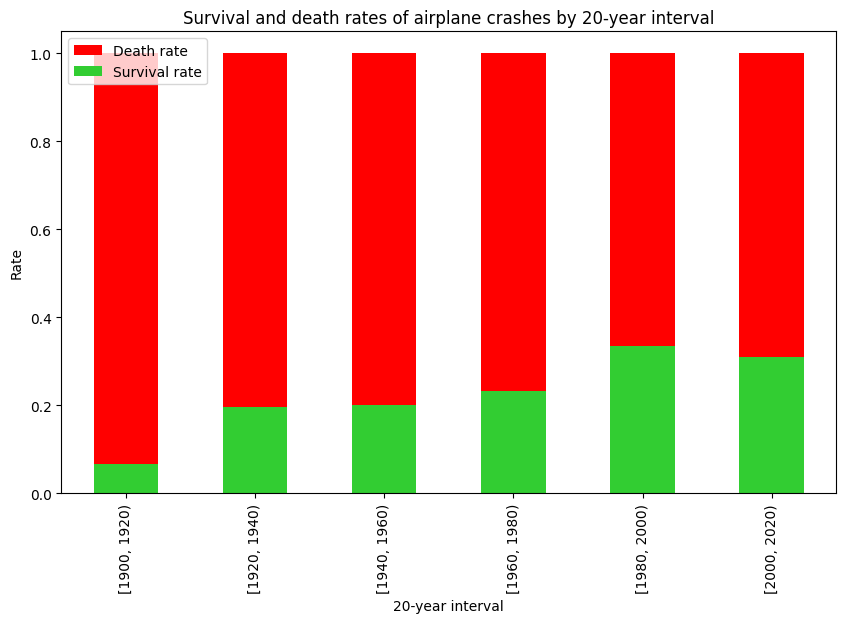

In [56]:
# Convert Date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column representing each 20-year interval
df['20-year interval'] = pd.cut(df['Date'].dt.year, bins=range(1900, 2021, 20), right=False)

# Calculate survival rate and death rate by the 20-year interval
grouped_df = df.groupby('20-year interval').agg({'Aboard': 'sum', 'Fatalities': 'sum'})
grouped_df['Survival rate'] = 1 - grouped_df['Fatalities'] / grouped_df['Aboard']
grouped_df['Death rate'] = grouped_df['Fatalities'] / grouped_df['Aboard']

# Create a bar chart with color-coded bars for survival rate and death rate
ax = grouped_df[['Survival rate', 'Death rate']].plot(kind='bar', stacked=True, color=['limegreen', 'red'], figsize=(10, 6))
plt.xlabel('20-year interval')
plt.ylabel('Rate')
plt.title('Survival and death rates of airplane crashes by 20-year interval')

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left')

# Show the plot
plt.show()

#### 1.3 Ý nghĩa của màu sắc
- Nhóm chúng em sử dụng màu xanh lá cây để biểu thị tỉ lệ số người sống sót sau tai nạn máy bay (tỷ lệ số người sống sót / số người tham gia chuyến bay), và sử dụng màu đỏ để biểu thị tỉ lệ số người thiệt mạng (tỷ lệ số người thiệt mạng / số người tham gia chuyến bay). Với màu xanh lá cây biểu thị cho sự sống sót và màu đỏ biểu thị cho cái chết, màu sắc trở thành một yếu tố hữu ích giúp người đọc nhanh chóng nhận ra và phân biệt các giá trị khác nhau trong biểu đồ.

- Màu xanh lá cây và đỏ là hai màu sắc tương phản mạnh, đây là lý do tại sao chúng được sử dụng để biểu thị cho hai giá trị tương phản nhau (tỷ lệ số người sống sót và tỷ lệ số người thiệt mạng). Khi đặt chúng cạnh nhau, hai màu sắc này dễ nhìn và dễ phân biệt, vì vậy chúng được sử dụng để tăng tính tương phản và tạo ra một hiệu ứng mạnh mẽ trong biểu đồ.

- Sau khi bổ sung màu vào biểu đồ, chúng ta cũng có thể rút ra thêm ý nghĩa về tỉ lệ số người sống sót và số người thiệt mạng qua các thập kỷ. Ví dụ, chúng ta có thể thấy rằng tỉ lệ sống sót tăng đáng kể từ thập kỷ 1940 đến thập kỷ 1960, và sau đó giảm trở lại trong những năm sau đó. Chúng ta cũng có thể thấy rằng tỉ lệ sống sót đã tăng đáng kể kể từ thập kỷ 2000. Các nhận xét này có thể giúp chúng ta hiểu hơn về sự thay đổi của an toàn hàng không qua các thập kỷ và điều gì có thể đã dẫn đến sự thay đổi đó.

#### 1.4 Kĩ thuật
- Đồ thị trên đã sử dụng kĩ thuật Item Aggregation để tính toán tỷ lệ sống sót và tỷ lệ tử vong của các vụ tai nạn máy bay theo khoảng thời gian 20 năm.

- Việc tính toán tỉ lệ này giúp trình bày dữ liệu một cách trực quan và dễ hiểu hơn, cũng như giúp nhận ra xu hướng và biến động của số liệu theo thời gian. Đồng thời, việc trình bày dữ liệu bằng cách sử dụng biểu đồ cột màu sắc khác nhau cho từng chỉ số giúp phân biệt dễ dàng hơn giữa các chỉ số và đưa ra những nhận định có tính thực tiễn.

#### 1.5 Nhận xét
- Tỷ lệ sống sót trong các vụ tai nạn hàng không tăng dần theo thời gian, trong khi tỷ lệ tử vong giảm dần. Điều này có thể phản ánh sự cải thiện của công nghệ hàng không, điều kiện an toàn và quy trình đào tạo phi công.

- Tỷ lệ sống sót và tử vong có sự khác biệt rõ rệt giữa các giai đoạn 20 năm. Trong giai đoạn 1900-1919, tỷ lệ tử vong rất cao, tuy nhiên từ giai đoạn 1940-1959 trở đi, tỷ lệ sống sót bắt đầu tăng và tỷ lệ tử vong giảm.

- Biểu đồ cũng cho thấy tỷ lệ sống sót và tử vong của các vụ tai nạn hàng không có sự thay đổi đáng kể sau các sự kiện lớn như Thế chiến thứ II, sự kiện 11/9, v.v.

### 2. Stacked Area Chart

#### 2.1 Lí do chọn biểu đồ
- Stacked Area Chart là một biểu đồ dạng khu vực, trong đó các khu vực được chồng lên nhau để tạo thành một khu vực lớn thể hiện sự thay đổi của các giá trị con thành phần (hoặc tỷ lệ phần trăm) qua thời gian. Mỗi khu vực trong Stacked Area Chart đại diện cho một phần của tổng giá trị được thể hiện. Khi nhìn vào biểu đồ, ta có thể thấy rõ được sự phân phối của giá trị của từng phần thành phần qua thời gian.

- Đối với loại biểu đồ này, nhóm quyết định sử dụng biểu đồ để trực quan hóa số lượng vụ tai nạn máy bay có hoặc không có thương vong theo thời gian. Nó cho thấy rõ ràng sự tăng giảm của số lượng vụ tai nạn máy bay trong mỗi năm và trong đó có bao nhiêu vụ có thương vong và bao nhiêu vụ không có thương vong. Biểu đồ này có thể giúp phân tích sự an toàn của ngành hàng không qua các năm và có thể hỗ trợ các quyết định chính sách và cải tiến trong lĩnh vực hàng không.

- Lý Do: Nhóm chọn loại biểu đồ này để trực quan vì Stacked Area Chart sẽ giúp chúng ta thấy rõ sự thay đổi của số liệu này qua các năm và cũng giúp phân tích được mức độ nghiêm trọng của các vụ tai nạn qua các năm. Ngoài ra, biểu đồ này cũng cho phép so sánh số lượng tai nạn có tử vong với số lượng tai nạn không có tử vong trong cùng một biểu đồ.

#### 2.2 Code

In [57]:
# Convert Date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group by year and calculate number of crashes with/without fatalities
new_df = df.groupby([df["Date"].dt.year, df["Fatalities"] > 0])["Date"].count().unstack()
new_df.fillna(0, inplace=True)
new_df.columns = ["No fatalities", "Has fatalities"]

# Create a trace for each column of the new_df dataframe
traces = []
colors = ['#2CA02C', '#D62728']
for i, column in enumerate(new_df.columns):
    trace = go.Scatter(x=new_df.index, y=new_df[column], name=column, line=dict(color=colors[i]))
    traces.append(trace)

# Create a layout with a Manipulate View option for the x-axis range
layout = go.Layout(title="Number of airplane crashes with/without fatalities over time",
                   xaxis=dict(title="Year", range=[1900, 2020], type="date",
                              rangeselector=dict(buttons=list([
                                  dict(count=10, label='10 years', step='year', stepmode='backward'),
                                  dict(count=25, label='25 years', step='year', stepmode='backward'),
                                  dict(count=50, label='50 years', step='year', stepmode='backward'),
                                  dict(step='all')
                              ])),
                              rangeslider=dict(visible=True)
                             ),
                   yaxis=dict(title="Number of crashes"),
                   margin=dict(l=50, r=50, b=50, t=50),
                   legend=dict(x=0.05, y=1))

# Create a figure with the traces and layout, and display it as a widget
fig = go.FigureWidget(data=traces, layout=layout)
fig.show()



#### 2.3 Ý nghĩa của màu sắc
- Trong biểu đồ trên, màu xanh lá cây được sử dụng để đại diện cho số lượng tai nạn máy bay không gây tử vong, và màu đỏ được sử dụng để đại diện cho số lượng tai nạn máy bay gây tử vong. Đây là cách phân biệt hai loại dữ liệu trong biểu đồ.

- Màu xanh lá cây và màu đỏ được sử dụng trong biểu đồ này là hai màu phổ biến được sử dụng để biểu thị hai loại dữ liệu đối lập trong các biểu đồ. Màu xanh lá cây thường được sử dụng để biểu thị những giá trị tích cực hoặc những kết quả tốt, trong khi màu đỏ thường được sử dụng để biểu thị các giá trị tiêu cực hoặc các giá trị mà có tác động tiêu cực.

- Việc sử dụng màu xanh lá cây và màu đỏ trong biểu đồ này giúp người đọc dễ dàng nhận ra sự khác biệt giữa số lượng tai nạn máy bay không gây tử vong và số lượng tai nạn máy bay gây tử vong, từ đó giúp phân tích và đưa ra các quyết định có liên quan đến an toàn bay.

#### 2.4 Kĩ thuật
- Nhóm chúng em đã sử dụng kĩ thuật Manipulate View để tạo ra một nút trượt để điều chỉnh dải giá trị của trục x. Khi chúng ta di chuyển nút trượt này, đồ thị sẽ tự động cập nhật để hiển thị dữ liệu ứng với dải giá trị được chọn.

- Điều này giúp người dùng có thể dễ dàng trực quan hóa dữ liệu trong khoảng thời gian mong muốn mà không cần phải thay đổi mã lệnh. Điều này đặc biệt hữu ích khi dữ liệu có số lượng lớn và khó để hiển thị toàn bộ trên một đồ thị duy nhất.

- Ví dụ, trong trường hợp của nhóm chúng em, dữ liệu của nhóm chúng em bao gồm số lượng tai nạn máy bay từ năm 1908 đến năm 2009. Với kĩ thuật Manipulate View, người dùng có thể tập trung vào các năm cụ thể mà họ quan tâm, chẳng hạn như những năm gần đây để kiểm tra tình trạng an toàn của việc bay hiện tại.

- Do đó, việc sử dụng kĩ thuật Manipulate View mang lại cho nhóm chúng em một cách tiếp cận trực quan và dễ dàng để khám phá dữ liệu và phân tích nó.

#### 2.5 Nhận xét
- Số lượng tai nạn máy bay có thương vong có xu hướng tăng dần từ năm 1920 đến năm 1945, sau đó thì số vụ tai nạn có thương vong biến động lên xuống liên tục.

- Số lượng vụ tai nạn máy bay không có thương vong có xu hướng ổn định từ 1920-2009.

- Trong số các tai nạn máy bay, đa số vụ tai nạn đều có người tử vong, số lượng vụ tai nạn không có thương vong chiếm số lượng rất ít.

- Có một số năm đặc biệt có số lượng tai nạn máy bay có thương vong cao hơn so với các năm khác, ví dụ như những năm 1946, 1972, 1973 và 1989.

### 3. Line Chart

#### 3.1 Lí do chọn biểu đồ
- Biểu đồ line chart là một dạng biểu đồ thường được sử dụng để trình bày mối quan hệ giữa các điểm dữ liệu liên tục trong thời gian hoặc trong không gian. Nó thường được sử dụng để trình bày xu hướng hoặc biến động của các dữ liệu trong thời gian, và cho phép người xem dễ dàng nhận thấy các biến đổi, đặc điểm, hoặc các sự kiện đặc biệt trong dữ liệu.

- Nhóm chúng em quyết định dùng biểu đồ này để trực quan nhằm giúp hiểu được phân bố số lượng tai nạn theo giờ trong ngày, đồng thời so sánh số lượng tai nạn có/ không có thương vong. 

- Lý do: Nhóm chọn loại biểu đồ này để trực quan bởi vì nó rất thích hợp để trực quan hóa dữ liệu thời gian. Biểu đồ line chart có thể thể hiện rõ ràng sự thay đổi của dữ liệu theo thời gian, giúp cho người đọc có thể dễ dàng nhận ra xu hướng và sự biến động của dữ liệu

#### 3.2 Code

In [58]:

# Convert Time column to datetime type
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

# Group by hour and calculate number of crashes with/without fatalities
new_df = df.groupby([df["Time"].dt.hour, df["Fatalities"] > 0])["Time"].count().unstack()
new_df.fillna(0, inplace=True)
new_df.columns = ["No fatalities", "Has fatalities"]

# Define color scale for the lines
color_scale = ["#2ca02c", "#d62728"]

# Create a trace for each column of the new_df dataframe with corresponding color
traces = []
for i, column in enumerate(new_df.columns):
    trace = go.Scatter(x=new_df.index, y=new_df[column], name=column, line=dict(color=color_scale[i]))
    traces.append(trace)

# Create a layout with a Manipulate View option for the x-axis range
layout = go.Layout(title="Number of airplane crashes with/without fatalities per hour of the day",
                   xaxis=dict(title="Hour of the day", tickvals=list(range(0, 24)), ticktext=[f"{h}:00" for h in range(0, 24)],
                              rangeselector=dict(buttons=list([
                                  dict(count=3, label='3 hours', step='hour', stepmode='backward'),
                                  dict(count=6, label='6 hours', step='hour', stepmode='backward'),
                                  dict(count=12, label='12 hours', step='hour', stepmode='backward'),
                                  dict(step='all')
                              ])),
                              rangeslider=dict(visible=True)
                             ),
                   yaxis=dict(title="Number of crashes"),
                   margin=dict(l=50, r=50, b=50, t=50),
                   legend=dict(x=0.05, y=1))

# Create a figure with the traces and layout, and display it as a widget
fig = go.Figure(data=traces, layout=layout)
fig.show()




#### 3.3 Ý nghĩa của màu sắc
- Nhóm em sử dụng màu xanh lá cây được sử dụng để đại diện cho số lượng vụ tai nạn máy bay không có người chết, trong khi đó màu đỏ được sử dụng để đại diện cho số lượng vụ tai nạn có người chết.

- Màu xanh lá cây thường được sử dụng để biểu thị những giá trị tích cực hoặc những kết quả tốt, trong khi đó màu đỏ thường được sử dụng để biểu thị những giá trị tiêu cực hoặc những kết quả xấu. Vì vậy, sử dụng màu xanh lá cây và đỏ trong biểu đồ này giúp tăng tính trực quan và dễ hiểu của dữ liệu.

- Sau khi bổ sung màu, ta có thể dễ dàng nhận thấy mức độ nghiêm trọng của các vụ tai nạn máy bay trong suốt 24 giờ. Đặc biệt là giữa khoảng từ 9 giờ sáng đến 6 giờ chiều, mức độ nghiêm trọng của các vụ tai nạn có người chết tăng lên đáng kể, đồng thời số lượng các vụ tai nạn không có người chết cũng giảm đi. Điều này có thể cho thấy rằng trong khoảng thời gian này, những vụ tai nạn có người chết có thể có liên quan đến mức độ khó khăn của việc thực hiện các chuyến bay.

#### 3.4 Kĩ thuật
- Nhóm chúng em đã sử dụng kĩ thuật Manipulate View để tạo ra một nút trượt để điều chỉnh dải giá trị của trục x. Khi chúng ta di chuyển nút trượt này, đồ thị sẽ tự động cập nhật để hiển thị dữ liệu ứng với dải giá trị được chọn.

- Điều này giúp người dùng có thể dễ dàng trực quan hóa dữ liệu trong khoảng thời gian mong muốn mà không cần phải thay đổi mã lệnh. Điều này đặc biệt hữu ích khi dữ liệu có số lượng lớn và khó để hiển thị toàn bộ trên một đồ thị duy nhất.

- Ví dụ, trong trường hợp của nhóm chúng em, dữ liệu của nhóm chúng em bao gồm số lượng tai nạn máy bay trong khoảng thời gian 0h-23h. Với kĩ thuật Manipulate View, người dùng có thể tập trung vào các giờ cụ thể mà họ quan tâm, chẳng hạn như những giờ thường xuyên xảy ra tai nạn máy bay có người chết để kiểm tra tình trạng an toàn của việc bay hiện tại.

- Do đó, việc sử dụng kĩ thuật Manipulate View mang lại cho nhóm chúng em một cách tiếp cận trực quan và dễ dàng để khám phá dữ liệu và phân tích nó.

#### 3.5 Nhận xét
- Số vụ tai nạn máy bay không chứa tử vong trong giờ làm việc ban ngày (từ 7 giờ sáng đến 6 giờ tối) cao hơn so với các giờ khác trong ngày. Tuy nhiên, số vụ tai nạn có tử vong cũng cao nhất vào khoảng thời gian này, cho thấy khả năng xảy ra tai nạn nghiêm trọng trong giờ cao điểm là cao.

- Trong giờ làm việc ban đêm (từ 7 giờ tối đến 6 giờ sáng), số vụ tai nạn có có tử vong tăng lên đáng kể so với các giờ trong ngày (đặc biệt là 0h), trong khi số vụ tai nạn không có tử vong giảm.

- Có thể thấy rằng số vụ tai nạn có tử vong vào lúc 0h là rất cao so với các giờ khác trong ngày, với hơn 2250 vụ tai nạn. Điều này có thể được giải thích bởi nhiều yếu tố khác nhau, ví dụ như tình trạng mệt mỏi của phi hành đoàn vào cuối ca bay đêm, những điều kiện ánh sáng và thời tiết xấu vào buổi đêm, sự mất tập trung sau thời gian bay dài, và nhiều yếu tố xấu khác nữa.

### 4. Bar chart

#### 4.1. Lý do lựa chọn biểu đồ

Bar chart là một biểu đồ hình chữ nhật sử dụng các cột dọc để biểu diễn dữ liệu số hoặc số liệu thống kê và thể hiện mối quan hệ so sánh, phân loại hoặc xu hướng của dữ liệu một cách trực quan.

#### 4.2. Code

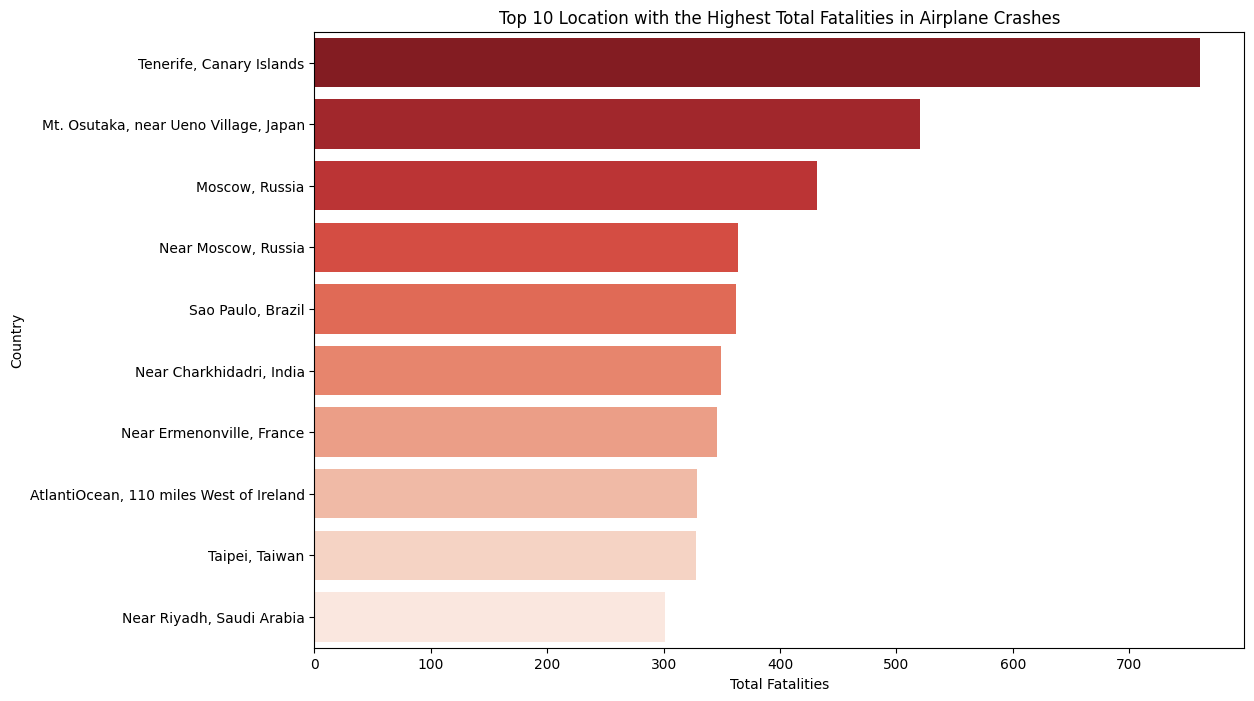

In [59]:
# Lọc dữ liệu theo quốc gia và số lượng tổn thất
df_filtered = df[['Location', 'Fatalities']].groupby(['Location']).agg(['count', 'sum'])
df_filtered.columns = ['Count', 'Total Fatalities']
df_filtered.reset_index(inplace=True)
df_filtered.sort_values('Total Fatalities', ascending=False, inplace=True)

# Trực quan hóa dữ liệu bằng biểu đồ barplot
plt.figure(figsize=(12,8))
sns.barplot(x='Total Fatalities', y='Location', data=df_filtered.head(10), palette='Reds_r')
plt.title('Top 10 Location with the Highest Total Fatalities in Airplane Crashes')
plt.xlabel('Total Fatalities')
plt.ylabel('Country')
plt.show()

#### 4.3. Ý nghĩa màu sắc
- Chọn tone màu đỏ tượng trưng cho sự mất mát, đỏ đậm thể hiện có số người chết cao, nhạt dần thể hiện số người chết giảm đi
#### 4.4. Kĩ thuật
- Filter được sử dụng để thực hiện việc giảm số lượng dữ liệu và lọc dữ liệu dựa trên một số điều kiện.
- Nhóm sẽ trực quan hóa số lượng vụ tai nạn và tổng số người thiệt mạng ở các quốc gia khác nhau.
#### 4.5. Nhận xét
- Biểu đồ cho thấy số người thiệt mạng do tai nạn máy bay của 10 địa điểm đứng đầu. 
- Chúng ta có thể dễ dàng nhận thấy rằng Tenerife, Canary Islands có tổng số lượng tử vong cao nhất, với hơn 700 người thiệt mạng trong tai nạn máy bay. Tiếp theo là Mt. Osutaka, near Ueno Village, Japan với hơn 500 người thiệt mạng.

### 5. Bar chart & line chart

#### 5.1. Lý do lựa chọn biểu đồ
- Bar chart là một biểu đồ hình chữ nhật sử dụng các cột dọc để biểu diễn dữ liệu số hoặc số liệu thống kê và thể hiện mối quan hệ so sánh, phân loại hoặc xu hướng của dữ liệu một cách trực quan.

- Line chart là một biểu đồ dùng đường thẳng để biểu diễn sự thay đổi hoặc xu hướng của dữ liệu theo thời gian hoặc các giá trị liên tục khác.

- Biểu đồ 1: Ta có thể trực quan hóa biểu đồ cột thể hiện số vụ tai nạn theo năm và biểu đồ đường thể hiện tổng số người chết trong các vụ tai nạn theo năm. 

- Biểu đồ 2: Chúng ta sử dụng một biểu đồ đường (line chart) để biểu diễn số lượng tai nạn máy bay theo thời gian và sử dụng một biểu đồ cột (bar chart) để biểu diễn số lượng tai nạn máy bay theo loại. 

#### 5.2. Code

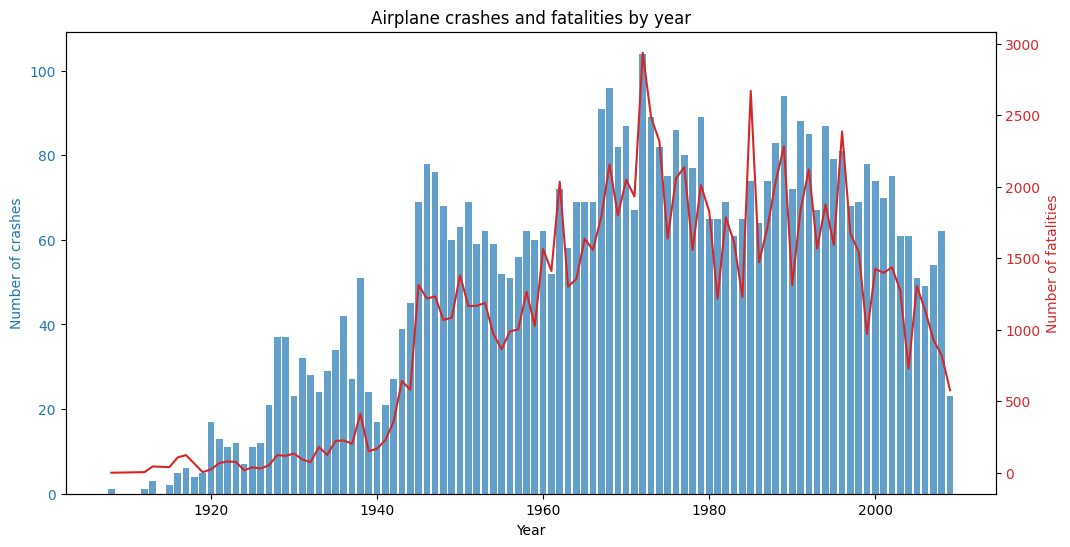

In [60]:
# Biểu đồ 1
# Tạo cột 'Year' từ cột 'Date'
df['Year'] = pd.DatetimeIndex(df['Date']).year

# Tính toán số vụ tai nạn theo năm
crashes_per_year = df.groupby('Year')['Date'].count()

# Tính toán tổng số người chết trong các vụ tai nạn theo năm
fatalities_per_year = df.groupby('Year')['Fatalities'].sum()

# Tạo biểu đồ cột
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(crashes_per_year.index, crashes_per_year.values, color='tab:blue', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of crashes', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Tạo biểu đồ đường
ax2 = ax1.twinx()
ax2.plot(fatalities_per_year.index, fatalities_per_year.values, color='tab:red')
ax2.set_ylabel('Number of fatalities', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Thiết lập tiêu đề
plt.title('Airplane crashes and fatalities by year')

# Hiển thị biểu đồ
plt.show()

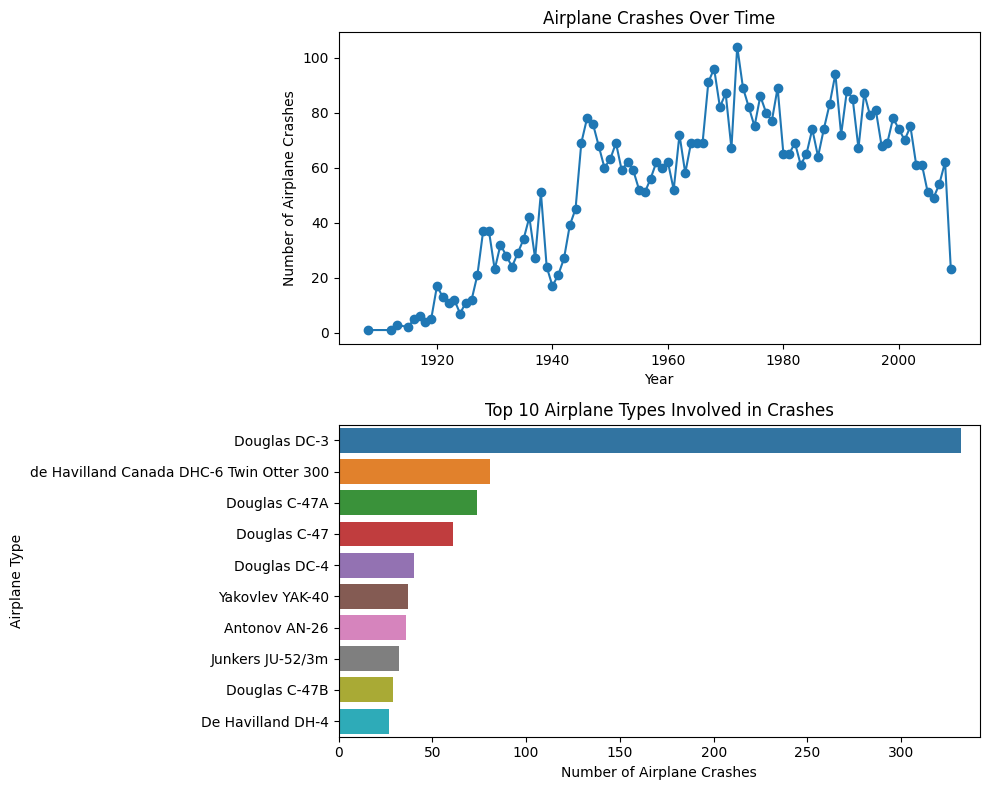

In [61]:
# Biểu đồ 2
# Biểu đồ đường: Đếm số lượng tai nạn máy bay theo năm
crashes_by_year = df.groupby('Year').size()

# Biểu đồ cột: Đếm số lượng tai nạn máy bay theo loại
crashes_by_type = df['Type'].value_counts().head(10)

# Tạo subplot để đồng bộ hóa các biểu đồ
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Biểu đồ thời gian
ax1.plot(crashes_by_year.index, crashes_by_year.values, marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Airplane Crashes')
ax1.set_title('Airplane Crashes Over Time')

# Biểu đồ theo loại máy bay
sns.barplot(x=crashes_by_type.values, y=crashes_by_type.index, ax=ax2)
ax2.set_xlabel('Number of Airplane Crashes')
ax2.set_ylabel('Airplane Type')
ax2.set_title('Top 10 Airplane Types Involved in Crashes')

# Đồng bộ hóa trục y cho biểu đồ theo loại máy bay
ax2.set_xlim([0, crashes_by_type.values.max() + 10])

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


#### 5.3 Ý nghĩa của màu sắc
- Biểu đồ 1: Nhóm em sử dụng màu xanh được sử dụng để đại diện cho số lượng vụ tai nạn máy bay theo năm, trong khi đó màu đỏ được sử dụng để đại diện cho tổng số người chết trong các vụ tai nạn theo năm.

- Biểu đồ 2: Ở biểu đồ cột nhóm sử dụng đa dạng màu sắc để phân biệt các loại máy bay, giúp biểu đồ thêm phần sống động.

#### 5.4. Kỹ thuật
- Biểu đồ 1:
    - Nhóm sử dụng kỹ thuật Superimpose Layers.

    - Superimpose Layers là kỹ thuật trực quan hóa dữ liệu bằng cách đưa các đồ thị, biểu đồ lên chồng lên nhau, giúp so sánh và phân tích các thông tin liên quan đến nhau.

- Biểu đồ 2:
    - Nhóm sử dụng kỹ thuật Juxtapose and Coordinate Views.
    
    - Kỹ thuật Juxtapose and Coordinate Views là một phương pháp để trực quan hóa dữ liệu từ nhiều nguồn thông qua việc hiển thị các biểu đồ hoặc các thành phần trực quan khác cùng lúc.

#### 5.5 Nhận xét
- Biểu đồ 1:
    - Có thể thấy số vụ tai nạn máy bay tăng lên đáng kể trong thập niên 1940 và đạt đỉnh điểm vào khoảng năm 1970 trước khi giảm dần.

    - Biểu đồ cũng cho thấy sự tăng trưởng vượt bậc của ngành hàng không trong những năm gần đây khi số vụ tai nạn máy bay giảm đáng kể từ những năm 2000.

    - Tuy nhiên, việc giảm số vụ tai nạn máy bay không đồng nghĩa với việc sự an toàn của ngành hàng không đã được đảm bảo hoàn toàn, vì số lượng 
    hành khách và chuyến bay cũng tăng lên nhanh chóng trong những năm qua.
- Biểu đồ 2: 
    - Biểu đồ đường thể hiện số lượng tai nạn máy bay theo năm, giúp chúng ta nhìn thấy xu hướng và biến động của các tai nạn qua thời gian.

    - Biểu đồ đường sử dụng đường thẳng nối các điểm dữ liệu giúp chúng ta dễ dàng nhận ra các xu hướng tăng giảm và các điểm cao điểm thấp trong dữ liệu.

    - Trục x của biểu đồ đường biểu thị năm và trục y biểu thị số lượng tai nạn máy bay.

    - Biểu đồ cột liệt kê top 10 loại máy bay gây ra nhiều tai nạn nhất.

    - Sử dụng biểu đồ cột để so sánh số lượng tai nạn của từng loại máy bay.

    - Trục x của biểu đồ cột biểu thị số lượng tai nạn và trục y biểu thị loại máy bay.

### 6. Bar chart

#### 6.1. Lý do lựa chọn biểu đồ
- Biểu đồ cột giúp chúng ta thống kê và có cái nhìn tổng quan để có được sự so sánh giữa các đối tượng
- Ở đây, hiển thị các cột các loại operator và rate survival tương ứng , giúp dễ dàng so sánh, đưa ra đánh giá dựa theo số lượng mỗi loại

#### 6.2. Code

In [62]:
df['Feature'] = np.where(df['Operator'].str.contains('Military'),'Military','Civil')
#Get operator
df['Operator'] = df['Operator'].str.split(" - ").apply(lambda x: x[-1])

C:\Users\Admin\AppData\Local\Temp\ipykernel_3368\4092981235.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



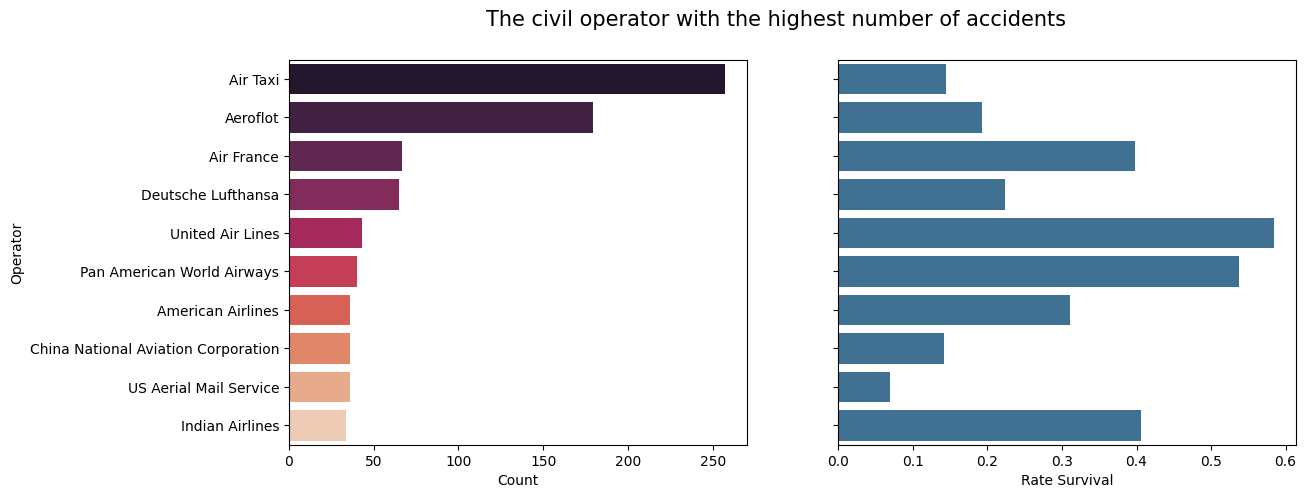

In [63]:
def plot_top_operator_crashes(n):
    air_company = df[df['Feature']=='Civil'].groupby("Operator")["Operator"].count().sort_values(ascending=False).head(n).sort_index(ascending=True)
    rate_survival = df[df['Feature']=='Civil'].groupby("Operator",as_index=False)["Aboard","Fatalities"].sum()
    rate_survival['Rate Survival'] = 1 - (rate_survival['Fatalities'] / rate_survival['Aboard'])
    rate_survival = rate_survival.loc[rate_survival['Operator'].isin(air_company.index)].iloc[:,[0,3]]
    rate_survival['Count'] = air_company.values
    rate_survival.sort_values(by='Count',ascending=False,inplace=True)

    f, (ax_bar1, ax_bar2) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(1,1)},figsize=(13,5))
    sns.barplot(data=rate_survival,x='Count',y='Operator',ax=ax_bar1,color='blue',palette='rocket')
    sns.barplot(data=rate_survival,x='Rate Survival',y='Operator',ax=ax_bar2,color='#3274a1').set(ylabel="")
    plt.suptitle("The civil operator with the highest number of accidents", fontsize=15)
plot_top_operator_crashes(10)


#### 6.3. Ý nghĩa màu sắc
- Biểu đồ cột sử dụng palette "rocket" để thể hiện các cột với màu đậm hơn ở đầu và màu sáng hơn ở cuối. Màu sắc này có thể làm nổi bật các giá trị lớn nhất thể hiện sự nghiêm trọng, tuy nhiên cũng có thể làm cho các giá trị nhỏ mờ nhạt hơn, thể hiện sự ít được quan tâm hơn
- Biểu đồ có trục x là "Rate Survival" sử dụng màu xanh dương có chỉ số màu là `#3274a1`, là màu tượng trưng cho sự hi vọng để thể hiện tỉ lệ sống sót
#### 6.4. Kĩ thuật
- Đồ thị trên đã sử dụng kĩ thuật Item Aggregation
#### 6.5. Nhận xét
- Trong các hãng máy bay dân dụng, Air Taxi và Aeroflot có số ca tai nạn máy bay nhiều nhất và gấp nhiều lần so với những hãng khác
- United Air Lines và Pan American World Airways có tỉ lệ người sống sót sau những vụ tai nạn là cao nhất: trên 50%

### 7. Line chart

#### 7.1. Lý do lựa chọn biểu đồ
- Hiển thị các đường tương ứng với số lượng máy bay cùng một khung đồ thị(xét trong cùng một khung thời gian như nhau đối với số lượng chuyến bay trung bình trong 5 năm). Giúp quan sát trực quan hơn khi nhìn vào đồ thị, cũng có thể dễ dàng so sánh đưa ra đánh giá.

#### 7.2. Code

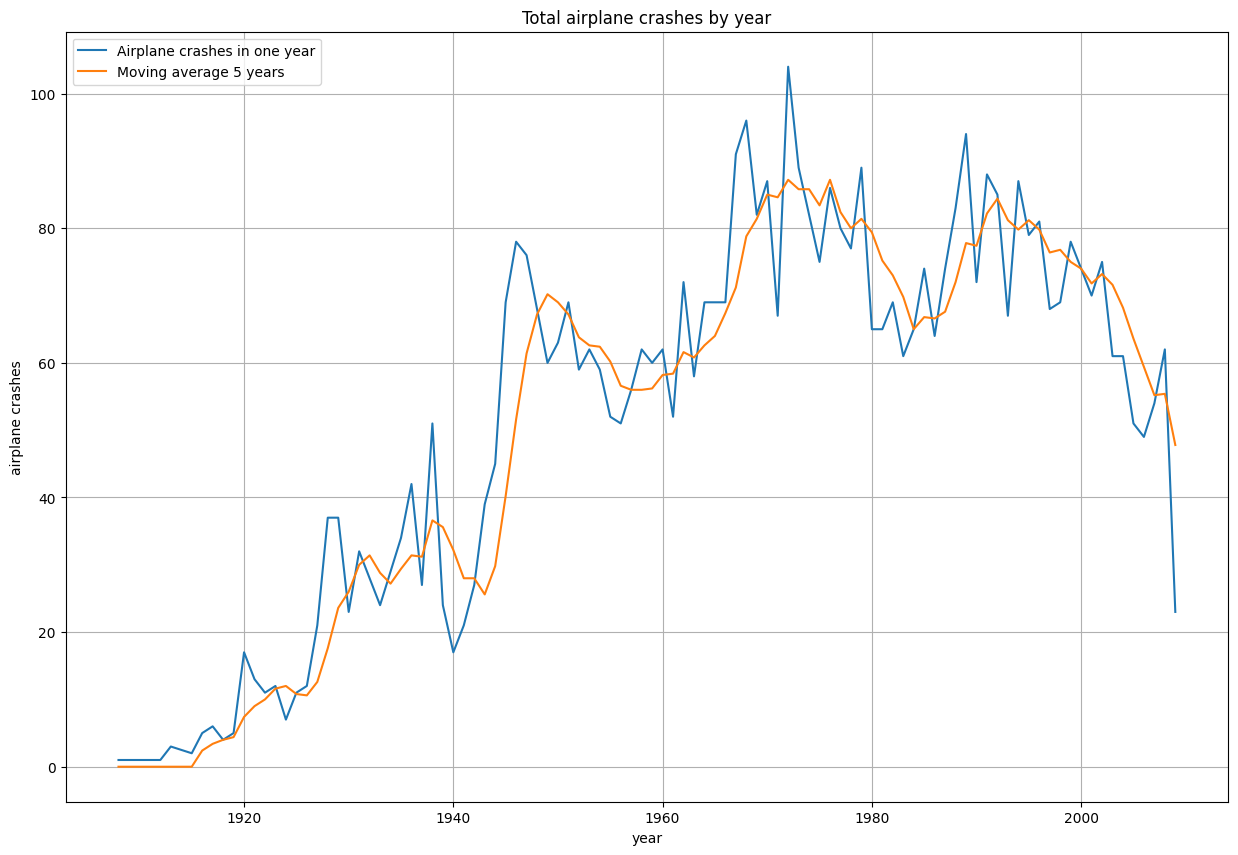

In [64]:
crashes_by_year = df.groupby(df['Date'].dt.year)['Date'].count()
crashes_by_year


# Moving average of airplane crashes by year, window size = 5 years
ma_crashes_by_year = crashes_by_year.rolling(window=5).mean()
# In moving average, there is a delay equal to window size - 1.
ma_crashes_by_year.fillna(0, inplace=True)
ma_crashes_by_year


plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(crashes_by_year, label='Airplane crashes in one year')
plt.plot(ma_crashes_by_year, label='Moving average 5 years')
plt.legend(loc=2)
plt.title('Total airplane crashes by year')
plt.xlabel('year')
plt.ylabel('airplane crashes');

#### 7.4. Kỹ thuật
- Đồ thị trên đã sử dụng kĩ thuật Static layers: Superimposed Line Charts, được giới thiệu trong bài Facet